In [4]:
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
eps = np.finfo(float).eps
from sklearn import linear_model
import copy

In [5]:
#Assigning column names to data
df=pd.read_csv('../input_data/data.csv')
Y=df['Chance of Admit ']
df=df.drop(['Serial No.','Chance of Admit '],axis=1)
X = (df - df.mean())/df.std()

In [6]:
# msk = np.random.rand(len(df)) < 0.8
train = X[:350]
test = X[350:]
print test.shape
train_X1=copy.deepcopy(train)

(100, 7)


In [7]:
train.insert(0, 'x0', np.ones(len(train)))

x0  GRE Score  TOEFL Score  University Rating       SOP      LOR   \
0    1.0   0.040384    -0.690991          -0.988084 -0.866855 -1.597605   
1    1.0   0.216817     0.139084          -0.111086 -0.363520  0.033837   
2    1.0   0.481468     0.471114          -0.111086  0.139815 -1.053791   
3    1.0   0.834335     0.969158           1.642909  1.146486  0.577651   
4    1.0   0.216817    -0.192946          -0.111086  0.139815 -1.053791   
5    1.0  -1.282869    -0.857006          -0.111086  0.139815  1.665279   
6    1.0   0.481468     0.471114           1.642909  1.146486  0.577651   
7    1.0  -0.841785    -0.026931          -0.988084 -0.363520  0.033837   
8    1.0  -0.136050    -0.358961          -0.111086 -1.370190 -1.053791   
9    1.0  -1.812170    -1.687081          -0.988084 -1.873525 -1.597605   
10   1.0   0.040384     0.471114          -0.111086  0.643150  1.121465   
11   1.0   0.569685     0.637128           1.642909  0.643150  1.665279   
12   1.0  -0.665351    -0.358961           0.765912  0.139815 -1.597605   
13   1.0   0.393251     0.305099          -0.111086 -0.363520 -0.509977   
14   1.0   1.451853     1.965248           1.642909  1.649821  1.121465   
15   1.0  -0.047833     0.305099           0.765912  1.146486  0.033837   
16   1.0   1.363636     1.799233          -0.988084  1.146486  0.033837   
17   1.0   0.657902    -1.189036          -0.111086  0.643150  1.665279   
18   1.0  -1.282869    -1.355051          -0.111086 -0.866855 -0.509977   
19   1.0  -1.547519    -1.189036          -0.988084 -1.370190 -1.597605   
20   1.0  -1.635736    -1.023021          -0.988084 -1.873525 -1.597605   
21   1.0  -0.400700    -1.521066          -1.865082  0.139815 -0.509977   
22   1.0  -1.635736    -1.355051          -1.865082 -1.873525 -0.509977   
23   1.0  -0.753568    -1.023021          -0.988084 -0.363520  0.577651   
24   1.0   0.922552     0.969158           0.765912  1.146486  1.121465   
25   1.0  -0.400700    -1.355051          -1.865082 -2.376861 -2.141419   
26   1.0   0.746118    -0.192946          -0.111086  0.139815  0.577651   
27   1.0  -0.577134    -0.358961          -0.988084 -0.363520  0.033837   
28   1.0   1.275419     0.803143           1.642909  0.643150  1.665279   
29   1.0   1.275419     1.301188           1.642909  0.643150  0.033837   
..   ...        ...          ...                ...       ...       ...   
320  1.0   0.922552     0.969158          -0.111086  0.139815 -0.509977   
321  1.0  -0.400700    -0.192946          -0.111086  0.643150  0.033837   
322  1.0  -1.106435    -1.023021          -0.988084 -1.370190 -1.053791   
323  1.0  -0.753568    -0.192946          -0.111086 -0.363520 -0.509977   
324  1.0   0.746118     0.803143          -0.988084 -0.363520  0.033837   
325  1.0   1.981154     1.135173           1.642909  0.643150  1.121465   
326  1.0  -1.723953    -1.355051           0.765912 -0.363520  0.033837   
327  1.0  -0.841785     0.305099          -0.111086  0.643150 -0.509977   
328  1.0   0.216817     0.471114          -0.111086  0.139815  0.033837   
329  1.0  -1.635736    -2.517156          -1.865082 -1.370190 -1.597605   
330  1.0   0.481468    -0.524976          -0.111086  0.139815  0.577651   
331  1.0  -0.224267    -0.026931          -0.988084 -0.866855  0.577651   
332  1.0   0.040384    -0.192946          -0.111086  0.139815 -0.509977   
333  1.0   0.746118     0.637128          -0.111086 -0.363520  0.033837   
334  1.0   0.216817    -0.358961          -0.111086 -0.363520  0.033837   
335  1.0   0.657902     0.803143           0.765912  0.643150  0.033837   
336  1.0  -0.400700    -0.026931          -0.111086 -0.363520 -1.597605   
337  1.0   1.010769     1.467203           1.642909  1.649821  1.665279   
338  1.0  -0.224267    -0.690991          -0.988084 -1.370190 -0.509977   
339  1.0   1.275419     1.467203           0.765912  1.146486  1.121465   
340  1.0   0.746118     0.803143           0.765912  0.643150  1.121465   
341  1.0   1.716504     1.96524

In [8]:
train_X=train
train_Y=Y[:350]
m=train_X.shape[0]
train_Y=train_Y.values.reshape(m,1)
train_X=train_X.values

In [9]:
theta = np.zeros([1,8])
print theta.shape
print train_X.shape
print train_Y.shape
alpha = 0.0001
iters = 100000

(1, 8)
(350, 8)
(350, 1)


In [10]:
def gradient_descent(X, y, theta, alpha, num_iters,lamb):
    for i in range(num_iters):
        theta1=copy.deepcopy(theta)
        theta1[0][0]=0
        gradient = np.matmul(X,theta.T) - y   
        theta = theta - (alpha/len(X))*(np.sum(X*gradient,axis=0)+0.5*lamb*np.sign(theta1))
    return theta

In [11]:
def predict(theta,test_X):
#     test_X.insert(0, 'x0', np.ones(len(test_X)))
    pred=[]
    for row in range(len(test_X)):
        ans=0
        for i in range(len(test_X.columns)):
            ans+=theta[i]*test_X.iloc[row,i]
        pred.append(ans)
    return pred

In [12]:
test_X=test
test_Y=Y[350:]
# test_X.insert(0, 'x0', np.ones(len(test_X)))

In [13]:
def predict(theta,test_X):
    pred=[]
    for row in range(len(test_X)):
        ans=0
        for i in range(len(test_X.columns)):
            ans+=theta[i+1]*test_X.iloc[row,i]
        ans=ans+theta[0]
        pred.append(ans)
    return pred

In [14]:
alpha_array=[]
error_array=[]
error_array_scikit=[]
lamb=1000.0

while lamb > 0.00000001:
    theta = np.zeros([1,8])
    p=gradient_descent(train_X, train_Y, theta, alpha, iters,lamb)
    pred=predict(p[0],test_X)
    error_array.append(1-r2_score(test_Y,pred))
    alpha_array.append(lamb)
    lamb=lamb/10
    
    
lamb=1000.0
print train_X1.shape
print test_X.shape
# train_X=train_X.drop('x0',axis=1)
while lamb > 0.00000001:
    reg = linear_model.Lasso(alpha=lamb)  
    reg.fit(train_X1, train_Y)
    pred2=reg.predict(test_X)
    error_array_scikit.append(1-r2_score(test_Y,pred2))
    lamb=lamb/10

(350, 7)
(100, 7)


[1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0000000000000002e-06, 1.0000000000000002e-07, 1.0000000000000002e-08] [1.0032847909912543, 1.003534100964537, 0.24288077287443754, 0.22493516845252803, 0.2248640629931309, 0.22485974988419943, 0.2248591600389911, 0.22485910037242074, 0.22485909442482577, 0.22485909383025326, 0.22485909377079882, 0.2248590937648537]


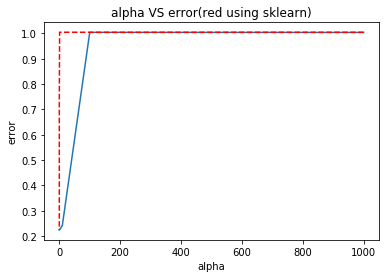

In [15]:
print alpha_array,error_array
plt.plot(alpha_array,error_array) # Create line plot with red dashed line
plt.plot(alpha_array,error_array_scikit,'r--') #using scikit learn
plt.title('alpha VS error(red using sklearn)')
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

# plt.plot(alpha_array,error_array_scikit) # Create line plot with red dashed line
# plt.title('alpha VS error using scikitlearn')
# plt.xlabel('alpha')
# plt.ylabel('error')
# plt.show()